In [1]:
using LinearAlgebra
using Plots

En esta demostración implementaremos el método de elementos finitos para resolver el ejercicio de la Práctica 1 para un número arbitrario de elementos.

In [2]:
#Definimos las variables del problema
E=1
A=1
le=1
l=6
Ke=E*A/le*[1 -1;-1 1] #Matriz de rigidez elemental

2×2 Matrix{Float64}:
  1.0  -1.0
 -1.0   1.0

In [3]:
#Creamos la matriz global para 6 elementos. Noten que la matriz se inicia en ceros
K=zeros(7,7)


7×7 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [ ]:
#Observemos lo que pasa al sumar la matriz elemental del primer elemento a la matriz global
K[1:2,1:2]+=Ke

In [5]:
#La matriz global quedo así
K


7×7 Matrix{Float64}:
  1.0  -1.0  0.0  0.0  0.0  0.0  0.0
 -1.0   1.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0  0.0  0.0  0.0  0.0  0.0

In [ ]:
# Ahora sumemos el segundo elemento
K[2:3,2:3]+=Ke

In [7]:
K


7×7 Matrix{Float64}:
  1.0  -1.0   0.0  0.0  0.0  0.0  0.0
 -1.0   2.0  -1.0  0.0  0.0  0.0  0.0
  0.0  -1.0   1.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0  0.0  0.0  0.0  0.0

In [8]:
#Este proceso se puede automatizar con un ciclo for
K=zeros(7,7)
for i=1:6
    K[i:i+1,i:i+1]+=Ke;
end
K

7×7 Matrix{Float64}:
  1.0  -1.0   0.0   0.0   0.0   0.0   0.0
 -1.0   2.0  -1.0   0.0   0.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0   0.0   0.0
  0.0   0.0  -1.0   2.0  -1.0   0.0   0.0
  0.0   0.0   0.0  -1.0   2.0  -1.0   0.0
  0.0   0.0   0.0   0.0  -1.0   2.0  -1.0
  0.0   0.0   0.0   0.0   0.0  -1.0   1.0

In [9]:
# Hacemos lo mismo para el vector de fuerzas
b=zeros(7,1)
be=0.5*[le;le]
for i=1:6
    b[i:i+1]+=be;
end
b

7×1 Matrix{Float64}:
 0.5
 1.0
 1.0
 1.0
 1.0
 1.0
 0.5

In [10]:
#Resolvemos el sistema de ecuaciones reducido
uh=K[2:end,2:end]\b[2:end]

6-element Vector{Float64}:
  5.500000000000001
 10.000000000000002
 13.500000000000002
 16.000000000000004
 17.500000000000004
 18.000000000000004

In [11]:
# Agregamos el desplazamiento en 0 que es cero
uh=[0;uh]

7-element Vector{Float64}:
  0.0
  5.500000000000001
 10.000000000000002
 13.500000000000002
 16.000000000000004
 17.500000000000004
 18.000000000000004

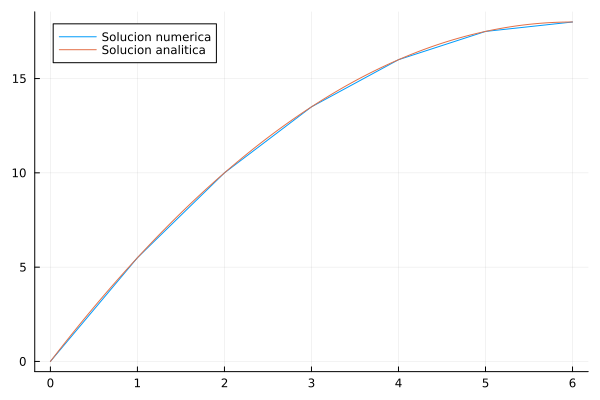

In [17]:
# Para graficar la solucion necesitamos definir las funciones de forma
# Definimos las funciones de forma
function N(x,i) #Definimos las funciones de forma lineales
    if x>le*(i-2) && x<le*(i-1)
        return (x-le*(i-2))/le
    elseif x>=le*(i-1) && x<le*(i)
        return (le*(i)-x)/le
    else
        return 0
    end
end
# Recuerden que la solucion es la suma de los coeficientes uh multiplicado por su funcion de forma correspondiente
x=0:0.01:l #discretizo el espacio
u(x)=sum([uh[i]*N(x,i) for i=1:7]) #Sumamos las soluciones locales para obtener la solución total
plot(x,u.(x),label="Solucion numerica") #Graficamos
plot!(x,-0.5*x.^2+l*x,label="Solucion analitica") #Graficamos la solucion analitica


In [18]:

# Juntemos todo el codigo en una funcion que nos permita cambiar el numero de elementos
function EF1D(E,A,l,Ne,b)
    le=l/Ne #tomamos elementos con longitudes iguales
    function N(x,i) #Definimos las funciones de forma lineales
        if x>le*(i-2) && x<le*(i-1)
            return (x-le*(i-2))/le
        elseif x>=le*(i-1) && x<le*(i)
            return (le*(i)-x)/le
        else
            return 0
        end
    end
# Creamos la matriz elemental y el vector de fuerza elemental
    Ke=E*A/le*[1 -1;-1 1]
    fe=b*le/2*[1; 1]
# Creamos la matriz y el vector global y ensamblamos
    K=zeros(Ne+1,Ne+1)
    f=zeros(Ne+1)
    for i=1:Ne
        K[i:i+1,i:i+1]+=Ke
        f[i:i+1]+=fe
    end
# Resolvemos el sistema de ecuaciones reducido
    uh=K[2:end,2:end]\f[2:end]
    uh=[0;uh]
# Sumamos las soluciones locales para obtener la solucion global
    x=0:0.01:l
    u=0*x
    for i=1:Ne+1
        u+=uh[i]*N.(x,i)
    end
    
    return u
end

EF1D (generic function with 1 method)

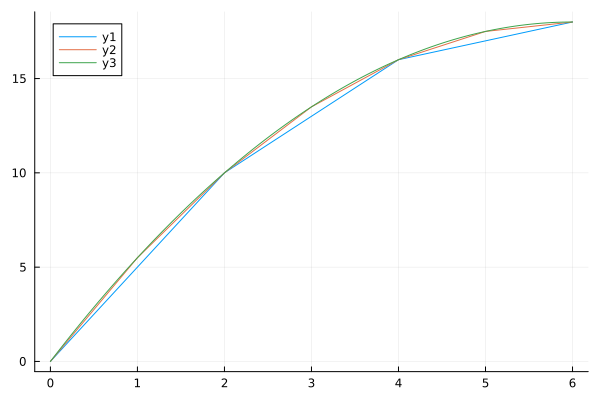

In [19]:
# Probemos el metodo con distintas cantidades de elementos
u3=EF1D(1,1,6,3,1)
u6=EF1D(1,1,6,6,1)
u100=EF1D(1,1,6,100,1)
x=0:0.01:6
plot(x,[u3,u6,u100])